In [1]:
#impoorting necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

In [2]:
#reading the data set into a csv file fpr a better view 
fuel_data = pd.read_csv('https://bit.ly/HDSC-StageOneDataset')
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
#checking for duplicated values
fuel_data.duplicated().sum()

0

In [4]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.0+ MB


In [5]:
#checking for the data set values 
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [6]:
#getting sme of the necesaaries and deep information on the data set
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
#perform a groupby function that calculate fuel_cost_per_unit_burned over the years by reading it into a new data frame for better understanding 
#by doing this I was able to plot my graph with ease

all_sum_in_year1 = pd.DataFrame(fuel_data.groupby(by=fuel_data['report_year']).sum())

all_sum_in_year1.head()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,131059,3.364163e+09,13138.051620,263292.115,7.859053e+04,3812.41711
1995,132277,4.458192e+09,12784.441067,425661.488,3.931506e+04,3445.47398
1996,118281,2.768693e+09,11726.508078,86425.275,1.000602e+07,2933.11773
1997,118553,3.077973e+09,11210.909740,163533.452,1.218738e+07,3406.15391
1998,121599,3.617070e+09,11850.394701,140238.656,3.178799e+05,3072.87907


In [8]:
#changing thye index of the data frame to the deafult indexing so that i can make use of my report_year
all_sum_in_year1.index.name = 'report_year'
all_sum_in_year1.reset_index(inplace = True)
all_sum_in_year1.head()

,report_year,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,131059,3.364163e+09,13138.051620,263292.115,7.859053e+04,3812.41711
1,1995,132277,4.458192e+09,12784.441067,425661.488,3.931506e+04,3445.47398
2,1996,118281,2.768693e+09,11726.508078,86425.275,1.000602e+07,2933.11773
3,1997,118553,3.077973e+09,11210.909740,163533.452,1.218738e+07,3406.15391
4,1998,121599,3.617070e+09,11850.394701,140238.656,3.178799e+05,3072.87907


In [9]:
#reading the first five data
all_sum_in_year1.head()

,report_year,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,131059,3.364163e+09,13138.051620,263292.115,7.859053e+04,3812.41711
1,1995,132277,4.458192e+09,12784.441067,425661.488,3.931506e+04,3445.47398
2,1996,118281,2.768693e+09,11726.508078,86425.275,1.000602e+07,2933.11773
3,1997,118553,3.077973e+09,11210.909740,163533.452,1.218738e+07,3406.15391
4,1998,121599,3.617070e+09,11850.394701,140238.656,3.178799e+05,3072.87907


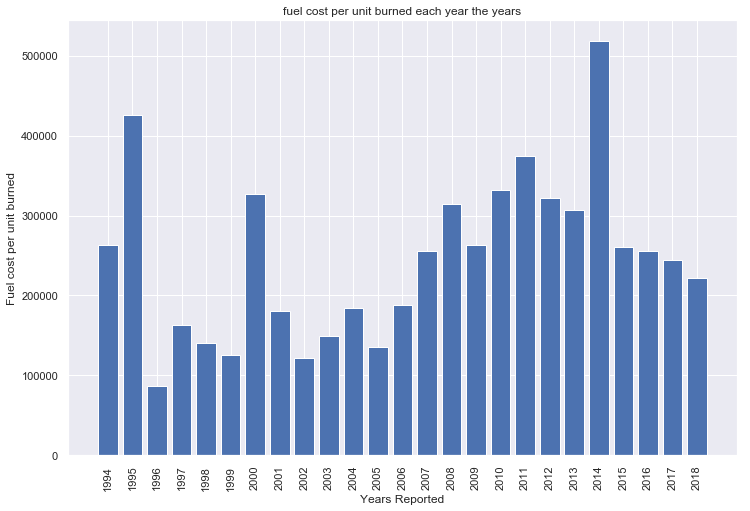

In [10]:
#plotting the graph for the fuel cost per unit burned for each year from (1995  - 2018)
plt.figure(figsize=(12, 8))
plt.title('fuel cost per unit burned each year the years')

plt.bar(all_sum_in_year1.report_year, all_sum_in_year1.fuel_cost_per_unit_burned)

plt.xticks(rotation=90)
plt.xticks(all_sum_in_year1.report_year)
plt.ylabel('Fuel cost per unit burned')
plt.xlabel('Years Reported')
plt.show()


In [11]:
#reading my real data set to perform another visualization
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [12]:
#getting the value counts for each plant name ferc
fuel_data['plant_name_ferc1'].value_counts().head()

big stone       156
four corners    151
riverside       133
coyote          121
louisa          119
Name: plant_name_ferc1, dtype: int64

In [13]:
#getting the value counts for each fuel units
fuel_data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [14]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [15]:
#getting the value counts for each fuel type code 
fuel_data['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [16]:
#plotting a bar chat for the get the percentage of of fuel types code 

#count the number of gas 
gas = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'gas'].count()[0]

#count the number of coal 
coal = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'coal'].count()[0]

#count the number of oil 
oil = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'oil'].count()[0]

#count the number of nuclear
nuclear = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'nuclear'].count()[0]

#count the number of waste
waste = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'waste'].count()[0]

#count the number of other
other = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'other'].count()[0]

<function matplotlib.pyplot.show(*args, **kw)>

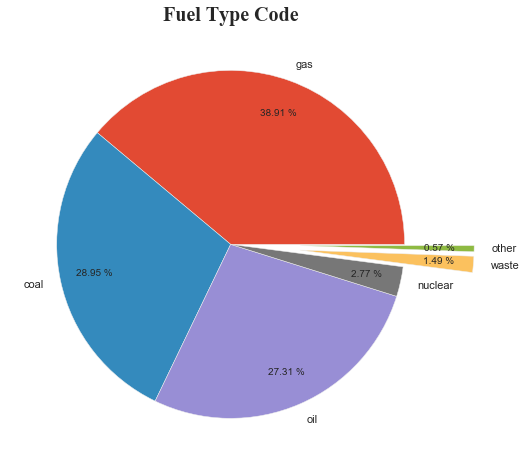

In [17]:
#the figsize of thye pie chart
plt.figure(figsize = (8,8))

#i use 'ggplot' style instead of the defualt style 
plt.style.use('ggplot')

#the labels i want to pass into my pie chart
labels = ['gas', 'coal', 'oil', 'nuclear', 'waste', 'other']

#I pass the explode parameters to divide the 'other' and the 'waste' to give a space in between both because theyare too close
explode = [0, 0, 0, 0, .4,.4]

#plotting the pie chart
plt.pie([gas, coal, oil, nuclear, waste, other], labels = labels, autopct = '%.2f %%', explode = explode, pctdistance = 0.8)

#The title of the pie chart
plt.title('Fuel Type Code', fontdict = {'fontname':  'Times New Roman', 'fontsize': 20})

plt.show

In [18]:
#Here i want to visualize the fuel cost per unit burned for each fuel type code 
#renaming it into a new data frame
x =pd.DataFrame(fuel_data.groupby('fuel_type_code_pudl').sum())

In [19]:
#changing the index to the deafult indexing 
x.index.name = 'fuel_type_code_pudl'
x.reset_index(inplace = True)
x

,fuel_type_code_pudl,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,988354,17133514,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,1425666,23040664,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,87851,1638430,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,913137,16186028,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,18448,334284,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,68026,884492,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


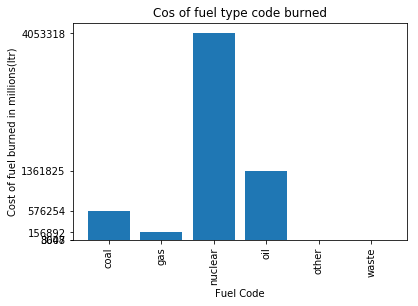

In [20]:
#the graph plotting 
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.title('Cos of fuel type code burned')

plt.bar(x.fuel_type_code_pudl, x.fuel_cost_per_unit_burned)

plt.xticks(rotation=90)
plt.xticks(x.fuel_type_code_pudl)
plt.yticks(x.fuel_cost_per_unit_burned)
plt.ylabel('Cost of fuel burned in millions(ltr)')
plt.xlabel('Fuel Code')
plt.show()

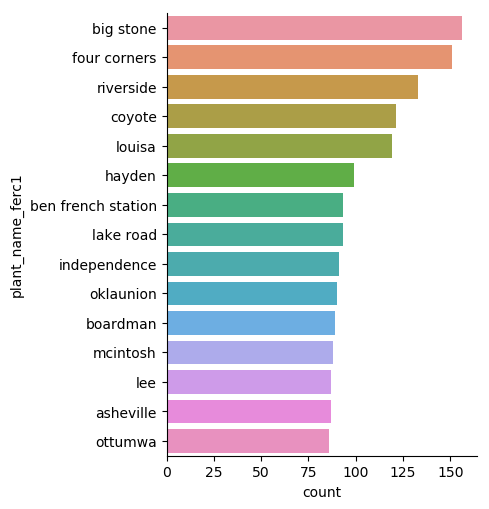

In [21]:
sns.catplot(y='plant_name_ferc1', data = fuel_data,kind='count', 
            order=fuel_data.plant_name_ferc1.value_counts().nlargest(15).index)